<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_46_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupación de clientes según comportamientos de compra


## 🎯 Objetivo General:

Simular un conjunto de datos de clientes con características comerciales, aplicar técnicas de machine learning no supervisado para segmentarlos mediante **agrupamiento (clustering)**, y visualizar los resultados para analizar distintos perfiles de cliente. Todo el proyecto debe estar organizado usando clases.



## 📦 Requisitos:

+ Utiliza las librerías:

  +numpy

  + matplotlib

  + sklearn.cluster.KMeans

  + sklearn.preprocessing.StandardScaler

+ Estructura tu código en **tres clases**:

  + SimuladorClientes

  + ModeloSegmentacionClientes

  + TestSegmentacionClientes

<br>
<br>


##  🧩 Clase **SimuladorClientes**. Esta clase debe simular los datos de clientes con las siguientes características:

  + Atributos esperados (por cliente):

    + Monto gastado: valor entre 100 y 10,000.

    + Frecuencia de compras: entre 1 y 100.

    + Categorías preferidas: 3 valores aleatorios entre 1 y 5 (representando número de compras por categoría).

  + Métodos:

    + def generar_datos(self) -> np.ndarray: Este método debe devolver un array de 200 muestras, cada una con 3 columnas:

      + Monto gastado
      + Frecuencia de compras
      + Total de categorías preferidas (suma de los 3 valores generados)
<br>
<br>


## 🧠 Clase **ModeloSegmentacionClientes**.Esta clase debe encargarse de entrenar el modelo y realizar predicciones.

  + Atributos:

    + n_clusters: número de grupos a formar (por defecto: 3).

    + scaler: instancia de StandardScaler.

    + modelo: instancia de KMeans.

  + Métodos requeridos:

    + 1.- entrenar(datos: np.ndarray) -> None:

      + Escala los datos con StandardScaler.

      + Ajusta el modelo KMeans.

      + Guarda los datos escalados como atributo para futuras visualizaciones.

    + 2.- predecir(cliente_nuevo: list) -> int:

      + Recibe un nuevo cliente (3 características).

      + Escala sus datos.

      + Devuelve el número de cluster al que pertenece.

<br>
<br>


## 🧪 Clase TestSegmentacionClientes.Clase para integrar y probar todo el sistema.

  + Método:

    + def ejecutar(self) -> None

      Este método debe:

        + 1.- **Crear** una instancia de SimuladorClientes y generar los datos.

        + 2.- **Instanciar** ModeloSegmentacionClientes con 3 clusters.

        + 3.- **Entrenar** el modelo con los datos simulados.

        + 4.- **Mostrar** los primeros 5 registros de los datos simulados.

        + 5.- **Predecir** el cluster para un nuevo cliente con los siguientes datos:

        cliente_nuevo = [2000, 10, 12]

        (Significa: gastó 2000, compra 10 veces, tiene 12 compras sumadas en sus categorías preferidas).

        + 6.- **Mostrar** por pantalla el cluster al que pertenece este nuevo cliente.

        + 7.- **Visualizar** de los datos segmentados usando matplotlib.

            + Representa los clientes en un gráfico de dispersión donde:

              + El eje X es el monto gastado.

              + El eje Y es la frecuencia de compras.

              + Los puntos se colorean según el cluster al que pertenecen (usa modelo.modelo.labels_ para obtenerlos).

            + Añade etiquetas, título, y barra de color.



## 💡 Consejos para el alumno

+ Usa np.column_stack para combinar varias columnas en un array.

+ Escalar los datos es fundamental en clustering: sin esto, las variables dominantes como “monto gastado” podrían sesgar los grupos.

+ Usa KMeans(n_clusters=3, random_state=42) para asegurar reproducibilidad.



## 🧪 Ejemplo de uso
```python
test = TestSegmentacionClientes()
test.ejecutar()
```

## Salida esperada
```python
Primeros 5 registros de datos simulados:
[[3.80794718e+03 2.40000000e+01 1.00000000e+01]
 [9.51207163e+03 7.50000000e+01 1.30000000e+01]
 [7.34674002e+03 7.20000000e+01 9.00000000e+00]
 [6.02671899e+03 3.60000000e+01 1.00000000e+01]
 [1.64458454e+03 3.80000000e+01 9.00000000e+00]]
Modelo entrenado con 3 clusters.
El nuevo cliente pertenece al cluster: 1
```

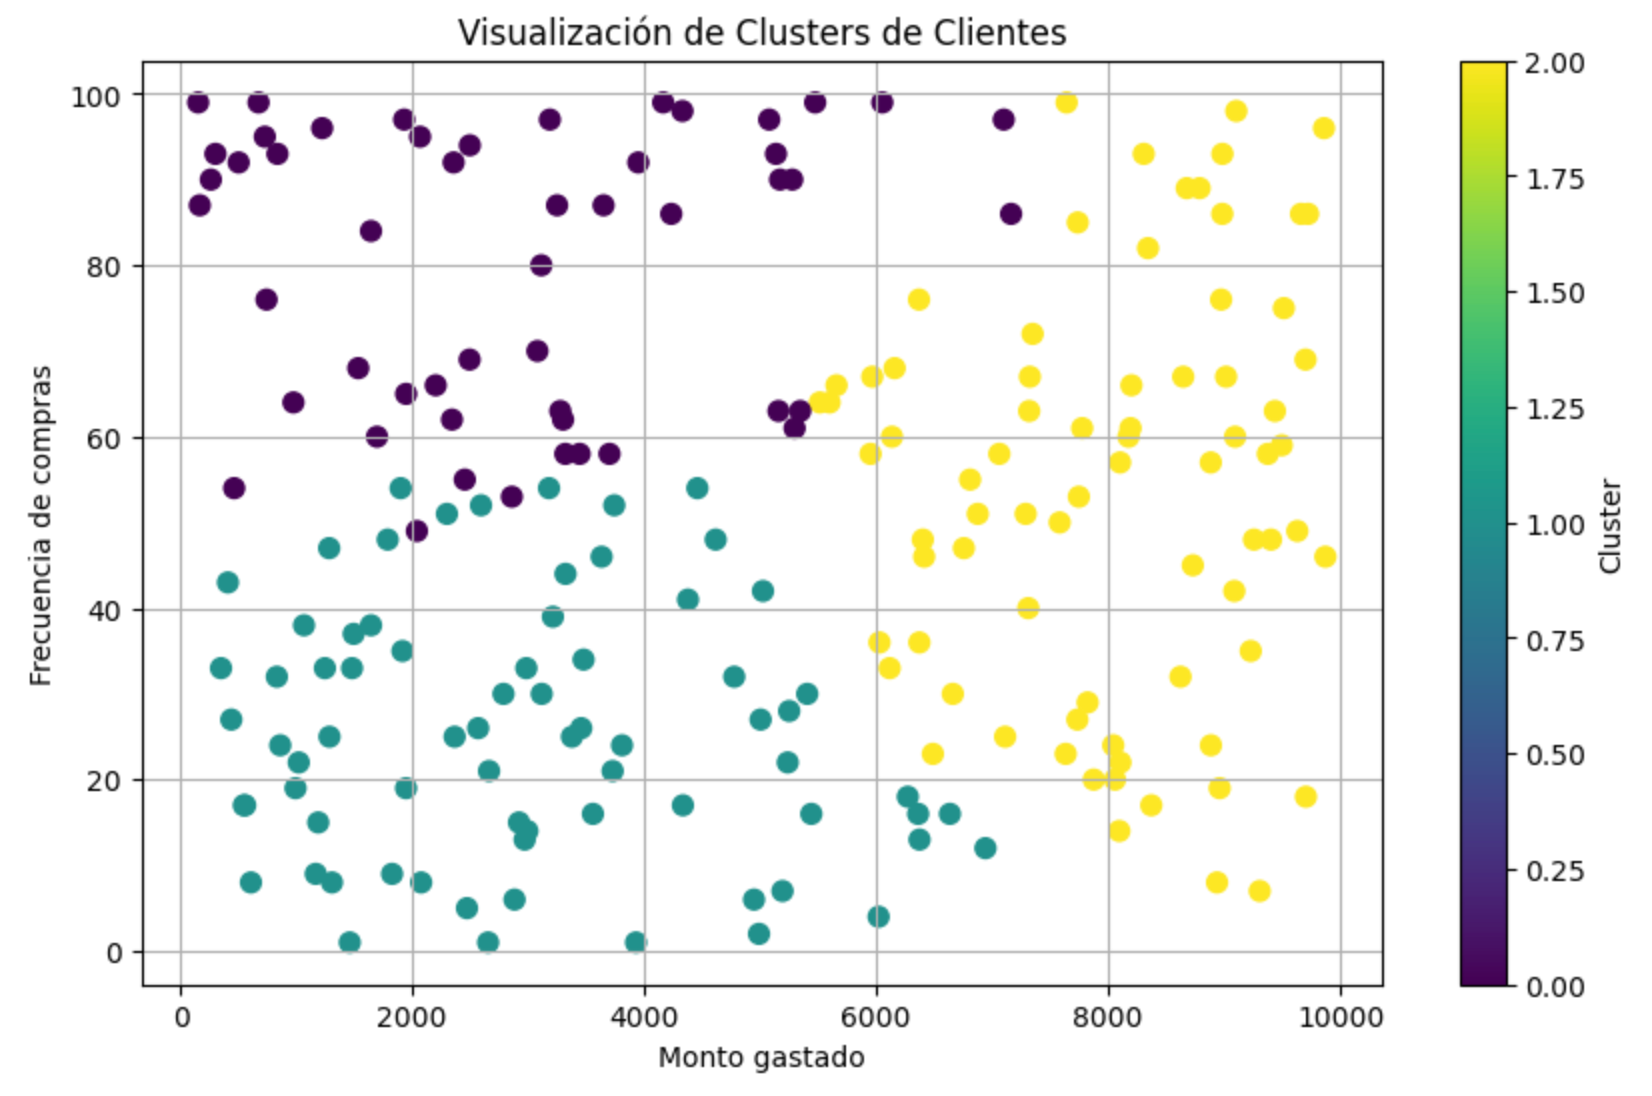

## Importación de librerías

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Definición de la clase SimuladorClientes

In [58]:
class SimuladorClientes:
  """
  Simula un conjunto de datos de clientes con características comerciales.

  Esta clase genera datos aleatorios para representar clientes
  basándose en su monto gastado, frecuencia de compras y categorías
  preferidas.
  """
  def generar_datos(self)->np.ndarray:
    """
    Genera un array de datos simulados para 200 clientes.

    Cada cliente tiene 3 características:
    - Monto gastado (entre 100 y 10,000)
    - Frecuencia de compras (entre 1 y 100)
    - Total de compras en categorías preferidas (suma de 3 valores entre 1 y 5)

    Returns:
        np.ndarray: Un array de NumPy con forma (200, 3) que contiene
                    los datos simulados de los clientes.
    """
    n = 200
    np.random.seed(42)

    # Generar monto gastado (200 valores entre 100 y 10000)
    montos = np.random.randint(1000, 10001, n)

    # Generar frecuencia de compras (200 valores entre 1 y 100)
    frequencias = np.random.randint(1, 101, n)

    # Generar 3 valores para categorías preferidas (entre 1 y 5) para cada cliente
    categorias = []
    for _ in range(n):
      sum_cate = np.random.randint(1, 6) + np.random.randint(1, 6) + np.random.randint(1, 6)
      categorias.append(sum_cate)

    # Combinar las características en un solo array
    return np.column_stack((montos, frequencias, categorias))


## Definición de la clase ModeloSegmentacionClientes

In [59]:
class ModeloSegmentacionClientes:
  """
  Encargada de entrenar y realizar predicciones usando el modelo KMeans.

  Esta clase gestiona el escalado de los datos y la aplicación del
  algoritmo de clustering KMeans para segmentar clientes.
  """
  def __init__(self, n_clusters:int):
    """
    Inicializa una instancia de ModeloSegmentacionClientes.

    Args:
        n_clusters (int): El número de clusters (grupos) a formar. Por
                          defecto es 3.
    """
    self.n_clusters = n_clusters

    # Instancia de KMeans con el número de clusters especificado y random_state
    # para asegurar reproducibilidad.
    self.modelo = KMeans(n_clusters=self.n_clusters, random_state=42)

    # Instancia de StandardScaler para escalar los datos
    self.scaler = StandardScaler()

    # Atributo para almacenar los datos escalados después del entrenamiento
    self._datos_escalados = None

  def entrenar(self, datos:np.ndarray)-> None :
    """
    Entrena el modelo KMeans con los datos proporcionados.

    Escala los datos utilizando StandardScaler y ajusta el modelo KMeans
    a los datos escalados. Los datos escalados se guardan para futuras
    visualizaciones.

    Args:
        datos (np.ndarray): Un array de NumPy con los datos de los clientes
                            para entrenar el modelo. Debe tener la forma
                            (n_muestras, n_características).
    """

    if self._datos_escalados is None:
      # Escalar los datos
      self._datos_escalados = self.scaler.fit_transform(datos)
      # Ajustar el modelo KMeans a los datos escalados
      self.modelo.fit(self._datos_escalados)
    else:
      raise Exception("El modelo ya ha sido entrenado")

  def predecir(self, datos:np.ndarray)->np.ndarray:
    """
    Predice el cluster al que pertenece un nuevo cliente o un conjunto de clientes.

    Recibe datos de uno o varios clientes, los escala utilizando el mismo
    StandardScaler usado para el entrenamiento, y devuelve el número de
    cluster predicho por el modelo KMeans para cada cliente.

    Args:
        datos: Una lista o un array de NumPy con los datos de uno o varios
                clientes. Cada cliente debe tener 3 características.
                Si es un solo cliente (lista), debe tener la forma [v1, v2, v3].
                Si es un array de NumPy, debe tener la forma (n_muestras, 3).

    Returns:
        np.ndarray: Un array de NumPy que contiene el índice del cluster
                    predicho para cada cliente de entrada.

    Raises:
        Exception: Si el modelo no ha sido entrenado previamente.
        TypeError: Si el argumento 'datos' no es una lista ni un array de NumPy.
    """
    if self._datos_escalados is not None:
      datos_np = np.array(datos).reshape(1, -1)
      datos_escalados = self.scaler.transform(datos_np)
      return self.modelo.predict(datos_escalados)
    else:
      raise Exception("El modelo no ha sido entrenado")

## Definición de la clase TestSegmentationClientes

In [60]:
class TestSegmentacionClientes:
  """
  Clase para integrar y probar el sistema completo de simulación y
  segmentación de clientes.

  Esta clase coordina la generación de datos, el entrenamiento del modelo
  de segmentación y la visualización de los resultados.
  """

  def ejecutar(self)-> None :
    """
    Ejecuta el flujo completo del proceso de segmentación de clientes.

    Realiza los siguientes pasos:
    1. Crea una instancia de SimuladorClientes y genera datos.
    2. Instancia ModeloSegmentacionClientes con 3 clusters.
    3. Entrena el modelo con los datos simulados.
    4. Muestra los primeros 5 registros de los datos simulados.
    5. Predice el cluster para un nuevo cliente de ejemplo.
    6. Muestra el cluster predicho para el nuevo cliente.
    7. Visualiza los datos segmentados en un gráfico de dispersión.
    """

    # 1.- Crear una instancia de SimuladorClientes y generar los datos.
    sc = SimuladorClientes()
    datos = sc.generar_datos()

    # 2.- Instanciar ModeloSegmentacionClientes con 3 clusters.
    # 3.- Entrenar el modelo con los datos simulados.
    n = 3
    msc = ModeloSegmentacionClientes(n_clusters=n)
    msc.entrenar(datos)

    # 4.- Mostrar los primeros 5 registros de los datos simulados.
    print("Primeros 5 registros de datos simulados")
    print(datos[0:5])
    print("Modelo entrenado con {n} clusters.")

    # 5.- Predecir el cluster para un nuevo cliente con los siguientes datos:
    nuevo_cliente = [2000, 10, 12]
    prediccion = msc.predecir(nuevo_cliente)
    # 6.- Mostrar por pantalla el cluster al que pertenece este nuevo cliente.
    print(f"El nuevo cliente pertenece al cluster {prediccion[0]}")

    # 7.- Visualización
    df = pd.DataFrame(datos, columns=["Monto gastado", "Frecuencia de compras", "Total de compras en categorías preferidas"])
    df["Cluster"] = msc.modelo.labels_

    plt.figure(figsize=(10, 6))
    plt.scatter(df["Monto gastado"], df["Frecuencia de compras"], c=df["Cluster"], cmap="viridis")
    plt.colorbar(label="Cluster")
    plt.xlabel("Monto gastado")
    plt.ylabel("Frecuencia de compras")
    plt.title("Segmentación de clientes")

Primeros 5 registros de datos simulados
[[8270   52   11]
 [1860   33    6]
 [6390   40    9]
 [6191   39    9]
 [6734   82   10]]
Modelo entrenado con {n} clusters.
El nuevo cliente pertenece al cluster 1


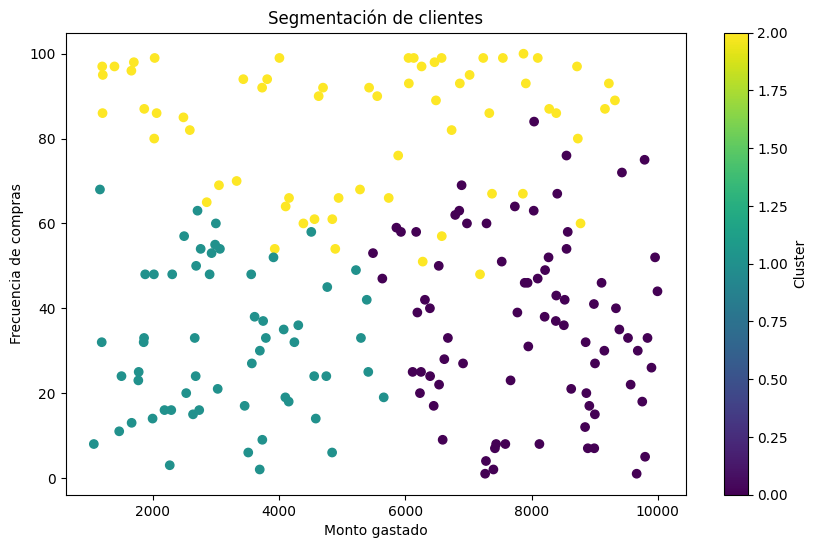

In [61]:
test = TestSegmentacionClientes()
test.ejecutar()